# Wizard of Oz 

In [1]:
from gensim.models import phrases, word2vec
from helpers import *
import nltk
import numpy as np
import codecs
from collections import Counter
from nltk.corpus import stopwords
import string
import gensim
import plotly 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import re
import matplotlib.pyplot as plt
import os
import collections

In [6]:
#Reference: https://github.com/Ravikumar10593-hub/NLP/blob/main/Gensim_Word2vec/Gensim%20Word2Vec%20model.ipynb
# https://blog.devgenius.io/nlp-tutorial-gensim-word2vec-with-codes-8f6c4b1bdf14

### Chapter Segmentation 

In [1]:
# This block of code starts by opening the text file 'wizardofoz.txt' in read mode ('r').
# The file is located in the 'data' directory.
# The 'latin-1' encoding is specified to handle any special characters that might be in the file.
# The 'with' keyword is used to automatically close the file once operations on it are done.
with open("data/wizardofoz.txt", 'r', encoding="latin-1") as file:
    # 'file.read()' reads the entire file.
    # '.splitlines()' is a string method that splits the string at line breaks 
    # (i.e., at each occurrence of '\n' or '\r\n'), and returns a list where each element is a line in the string.
    lines = file.read().splitlines()

# The 'lines_tokenized' list is created using a list comprehension.
# For each line in 'lines', 'line.split()' splits the line at whitespace (spaces, tabs, newlines), 
# returning a list where each element is a word or token.
lines_tokenized = [line.split() for line in lines]

# This line of code prints out the 'lines_tokenized' list. 
# Each element of the list is a list of the words/tokens from one line of the text file.
print(lines_tokenized)


[['The', 'Wonderful', 'Wizard', 'of', 'Oz'], ['Chapter', 'I'], ['The', 'Cyclone'], ['Dorothy', 'lived', 'in', 'the', 'midst', 'of', 'the', 'great', 'Kansas', 'prairies,', 'with', 'Uncle', 'Henry,', 'who', 'was', 'a', 'farmer,', 'and', 'Aunt', 'Em,', 'who', 'was', 'the', 'farmerÕs', 'wife.', 'Their', 'house', 'was', 'small,', 'for', 'the', 'lumber', 'to', 'build', 'it', 'had', 'to', 'be', 'carried', 'by', 'wagon', 'many', 'miles.', 'There', 'were', 'four', 'walls,', 'a', 'floor', 'and', 'a', 'roof,', 'which', 'made', 'one', 'room;', 'and', 'this', 'room', 'contained', 'a', 'rusty', 'looking', 'cookstove,', 'a', 'cupboard', 'for', 'the', 'dishes,', 'a', 'table,', 'three', 'or', 'four', 'chairs,', 'and', 'the', 'beds.', 'Uncle', 'Henry', 'and', 'Aunt', 'Em', 'had', 'a', 'big', 'bed', 'in', 'one', 'corner,', 'and', 'Dorothy', 'a', 'little', 'bed', 'in', 'another', 'corner.', 'There', 'was', 'no', 'garret', 'at', 'all,', 'and', 'no', 'cellarÑexcept', 'a', 'small', 'hole', 'dug', 'in', 'the'

In [3]:

chapters = collections.defaultdict(list)
current_chapter = 0

# Regular expression pattern for chapter headings, which assumes Roman numerals.
chapter_pattern = re.compile('Chapter\s+[IVXLCDM]+', re.IGNORECASE)

for line in lines:
    if chapter_pattern.match(line.strip()):
        current_chapter += 1
    else:
        chapters[current_chapter].extend(line.split())

In [4]:
stop_words = set(stopwords.words('english'))

chapter_word_freqs = {}

for chapter, words in chapters.items():
    word_freq = collections.Counter()
    for word in words:
        word = re.sub(r'\W+', '', word).lower()  # Remove non-alphanumeric characters
        if word and word not in stop_words:  # Ignore stop words
            word_freq[word] += 1
    chapter_word_freqs[chapter] = word_freq

# Print word frequencies for each chapter
for chapter, word_freq in chapter_word_freqs.items():
    print(f"Chapter {chapter if chapter != 0 else 'Preamble'}:")
    for word, freq in word_freq.most_common(10):  # Print top 10 words
        print(f"{word}: {freq}")
    print("\n")


Chapter Preamble:
wonderful: 1
wizard: 1
oz: 1


Chapter 1:
dorothy: 14
house: 11
toto: 10
gray: 9
aunt: 8
em: 7
could: 7
wind: 7
cyclone: 6
uncle: 6


Chapter 2:
dorothy: 31
little: 25
witch: 22
woman: 14
said: 13
munchkins: 10
house: 9
one: 9
old: 9
wicked: 9


Chapter 3:
dorothy: 24
said: 14
scarecrow: 13
toto: 11
blue: 11
little: 8
girl: 8
emerald: 8
people: 8
stuffed: 8


Chapter 4:
said: 17
scarecrow: 16
would: 10
farmer: 9
dorothy: 8
òi: 7
see: 7
brains: 6
could: 6
soon: 6


Chapter 5:
tin: 24
scarecrow: 18
woodman: 17
dorothy: 13
axe: 12
could: 12
òi: 11
said: 10
made: 10
one: 9


Chapter 6:
lion: 23
said: 19
tin: 13
woodman: 13
dorothy: 12
heart: 10
could: 9
òi: 8
scarecrow: 8
made: 7


Chapter 7:
lion: 21
scarecrow: 16
woodman: 14
dorothy: 13
tree: 12
said: 12
tin: 11
would: 10
great: 9
could: 9


Chapter 8:
scarecrow: 20
said: 19
tin: 16
woodman: 16
lion: 16
dorothy: 14
get: 13
flowers: 13
river: 12
stork: 11


Chapter 9:
mice: 23
woodman: 15
queen: 14
little: 12
scarecrow: 

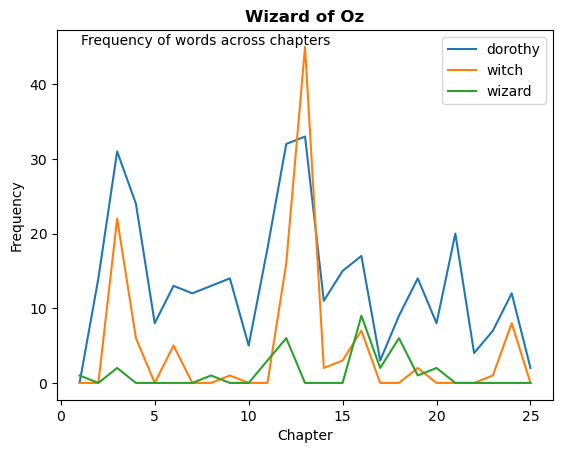

In [14]:
import matplotlib.pyplot as plt

target_words = ["dorothy", "witch", "wizard"]

# Collect frequencies of target words
target_word_freqs = {word: [] for word in target_words}
for chapter, word_freq in chapter_word_freqs.items():
    for target_word in target_words:
        target_word_freqs[target_word].append(word_freq[target_word])

# Plot word frequencies
fig, ax = plt.subplots()
for word, freqs in target_word_freqs.items():
    ax.plot(range(1, len(freqs) + 1), freqs, label=word)

ax.set_xlabel('Chapter')
ax.set_ylabel('Frequency')
ax.set_title('Wizard of Oz', fontsize=12, fontweight='bold')
ax.title.set_position([.5, 1.05])  # Adjusts position to act as a main title
ax.text(.3, .96, 'Frequency of words across chapters', fontsize=10, ha='center', transform=ax.transAxes)  # Adds subtitle
ax.legend()


# Ensure the figures directory exists
if not os.path.exists('figures'):
    os.makedirs('figures')
    
# Save the figure in the figures directory  
plt.savefig('figures/target_words_frequency_WZ.png')

plt.show()